### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/ham10000/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,dx,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,nv,train,0.017459,-0.006133,0.042509,0.032119,-0.020298,-0.029999,-0.019345,-0.005980,...,-0.085103,-0.035549,0.022616,0.014842,-0.010682,0.007425,-0.010183,0.059058,0.028891,0.073401
1,nv,train,0.013314,-0.004718,0.036896,0.013657,-0.018710,-0.000790,-0.018275,0.021898,...,-0.024121,0.001504,0.007381,0.028216,-0.033343,-0.007173,0.025764,0.037911,-0.028967,0.032034
2,akiec,train,0.023076,-0.006460,0.046531,-0.007525,-0.052272,0.024759,-0.004904,0.024593,...,-0.076046,-0.025927,0.019258,0.013950,-0.013910,0.000220,-0.016514,0.060165,0.028732,0.068683
3,nv,train,0.002341,-0.042092,0.056254,0.000176,-0.013943,0.011410,0.002411,0.001611,...,-0.017013,-0.020450,0.020093,0.021699,-0.018428,0.018907,0.022027,0.045309,-0.014772,0.017288
4,nv,train,0.012029,-0.003644,0.028491,0.017455,-0.017562,-0.005040,0.016783,0.031028,...,-0.093017,-0.022929,0.013042,0.007998,-0.020830,-0.015631,-0.007309,0.057171,0.030298,0.068561


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'dx'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (8012, 1026)
Test Shape: (2003, 1026)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 132359


STAGE:2024-02-08 22:58:13 5178:5178 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.6575, macro-f1: 0.4787
Epoch 1/30 - Training Time: 0.76 seconds | Inference Time: 0.16 seconds
Epoch 2/30 - Test Accuracy: 0.7164, macro-f1: 0.5643
Epoch 2/30 - Training Time: 0.65 seconds | Inference Time: 0.16 seconds
Epoch 3/30 - Test Accuracy: 0.7619, macro-f1: 0.6126
Epoch 3/30 - Training Time: 0.55 seconds | Inference Time: 0.20 seconds
Epoch 4/30 - Test Accuracy: 0.7279, macro-f1: 0.6043
Epoch 4/30 - Training Time: 0.68 seconds | Inference Time: 0.18 seconds
Epoch 5/30 - Test Accuracy: 0.7698, macro-f1: 0.6088
Epoch 5/30 - Training Time: 0.58 seconds | Inference Time: 0.19 seconds
Epoch 6/30 - Test Accuracy: 0.7733, macro-f1: 0.6381
Epoch 6/30 - Training Time: 0.69 seconds | Inference Time: 0.19 seconds
Epoch 7/30 - Test Accuracy: 0.7419, macro-f1: 0.6361
Epoch 7/30 - Training Time: 0.60 seconds | Inference Time: 0.19 seconds
Epoch 8/30 - Test Accuracy: 0.7798, macro-f1: 0.6209
Epoch 8/30 - Training Time: 0.59 seconds | Inference Time: 0.19 seconds


STAGE:2024-02-08 22:58:42 5178:5178 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 22:58:42 5178:5178 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.86%        2.222s        53.29%       12.012s       3.178ms    -944.57 Mb    -959.34 Mb          3780  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        39.75%        8.960s        40.36%        9.097s       1.895ms       1.15 Gb       1.15 Gb          4800  
                              Optimizer.step#AdamW.step         6.57%        1.481s        19.53%        4.401s       1.164ms       1.01 Mb      -3.70

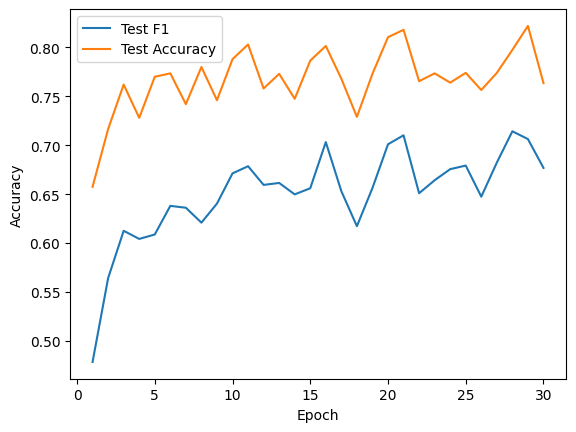

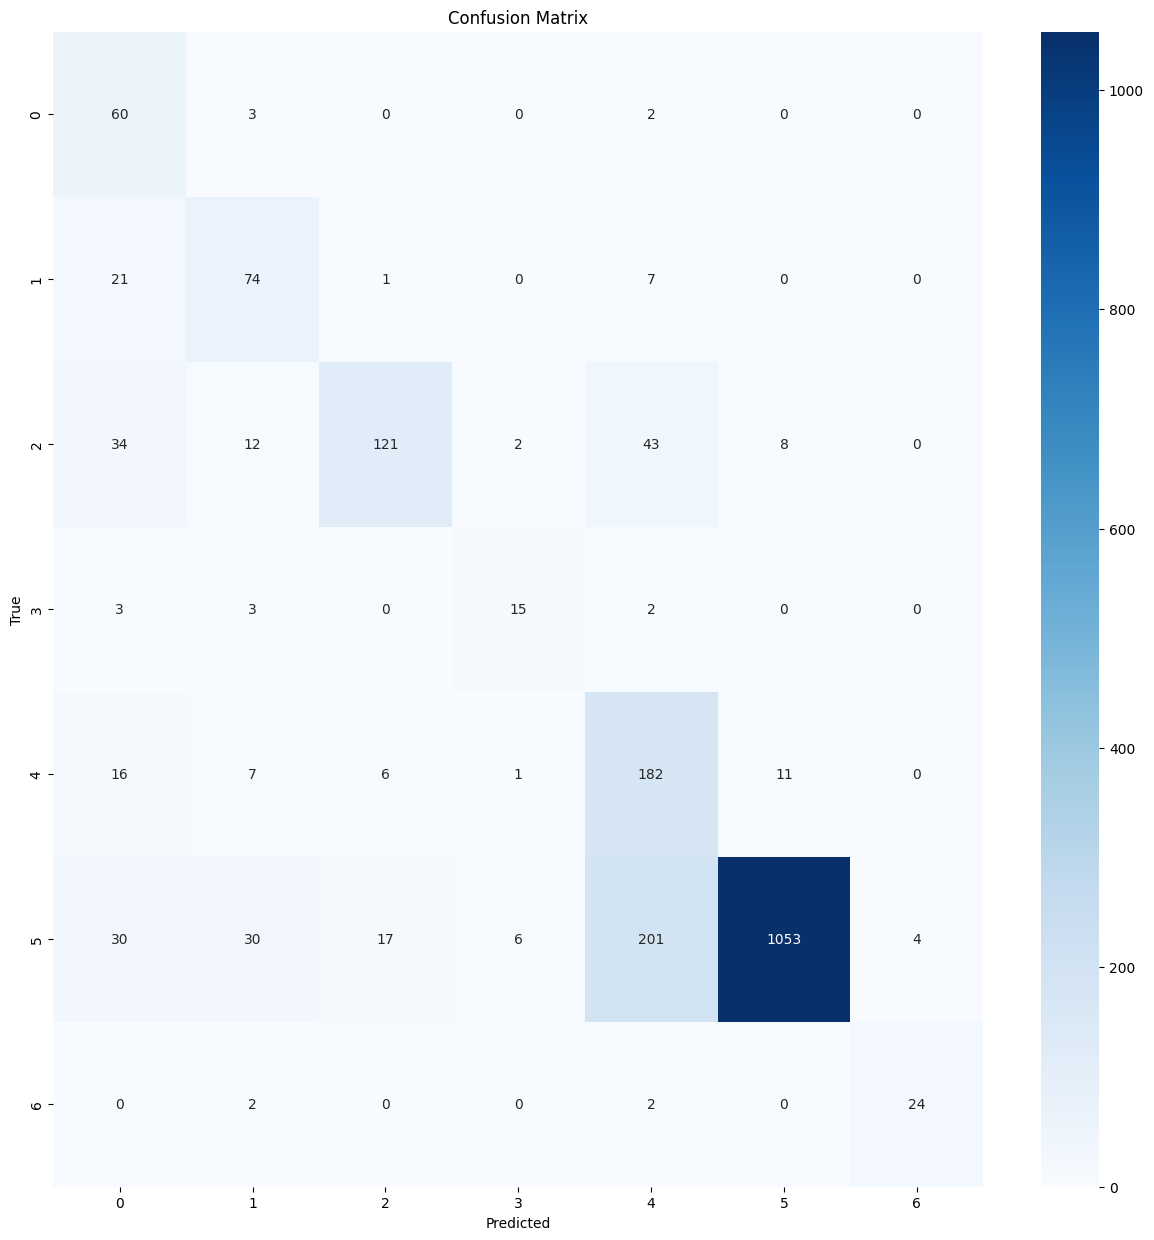

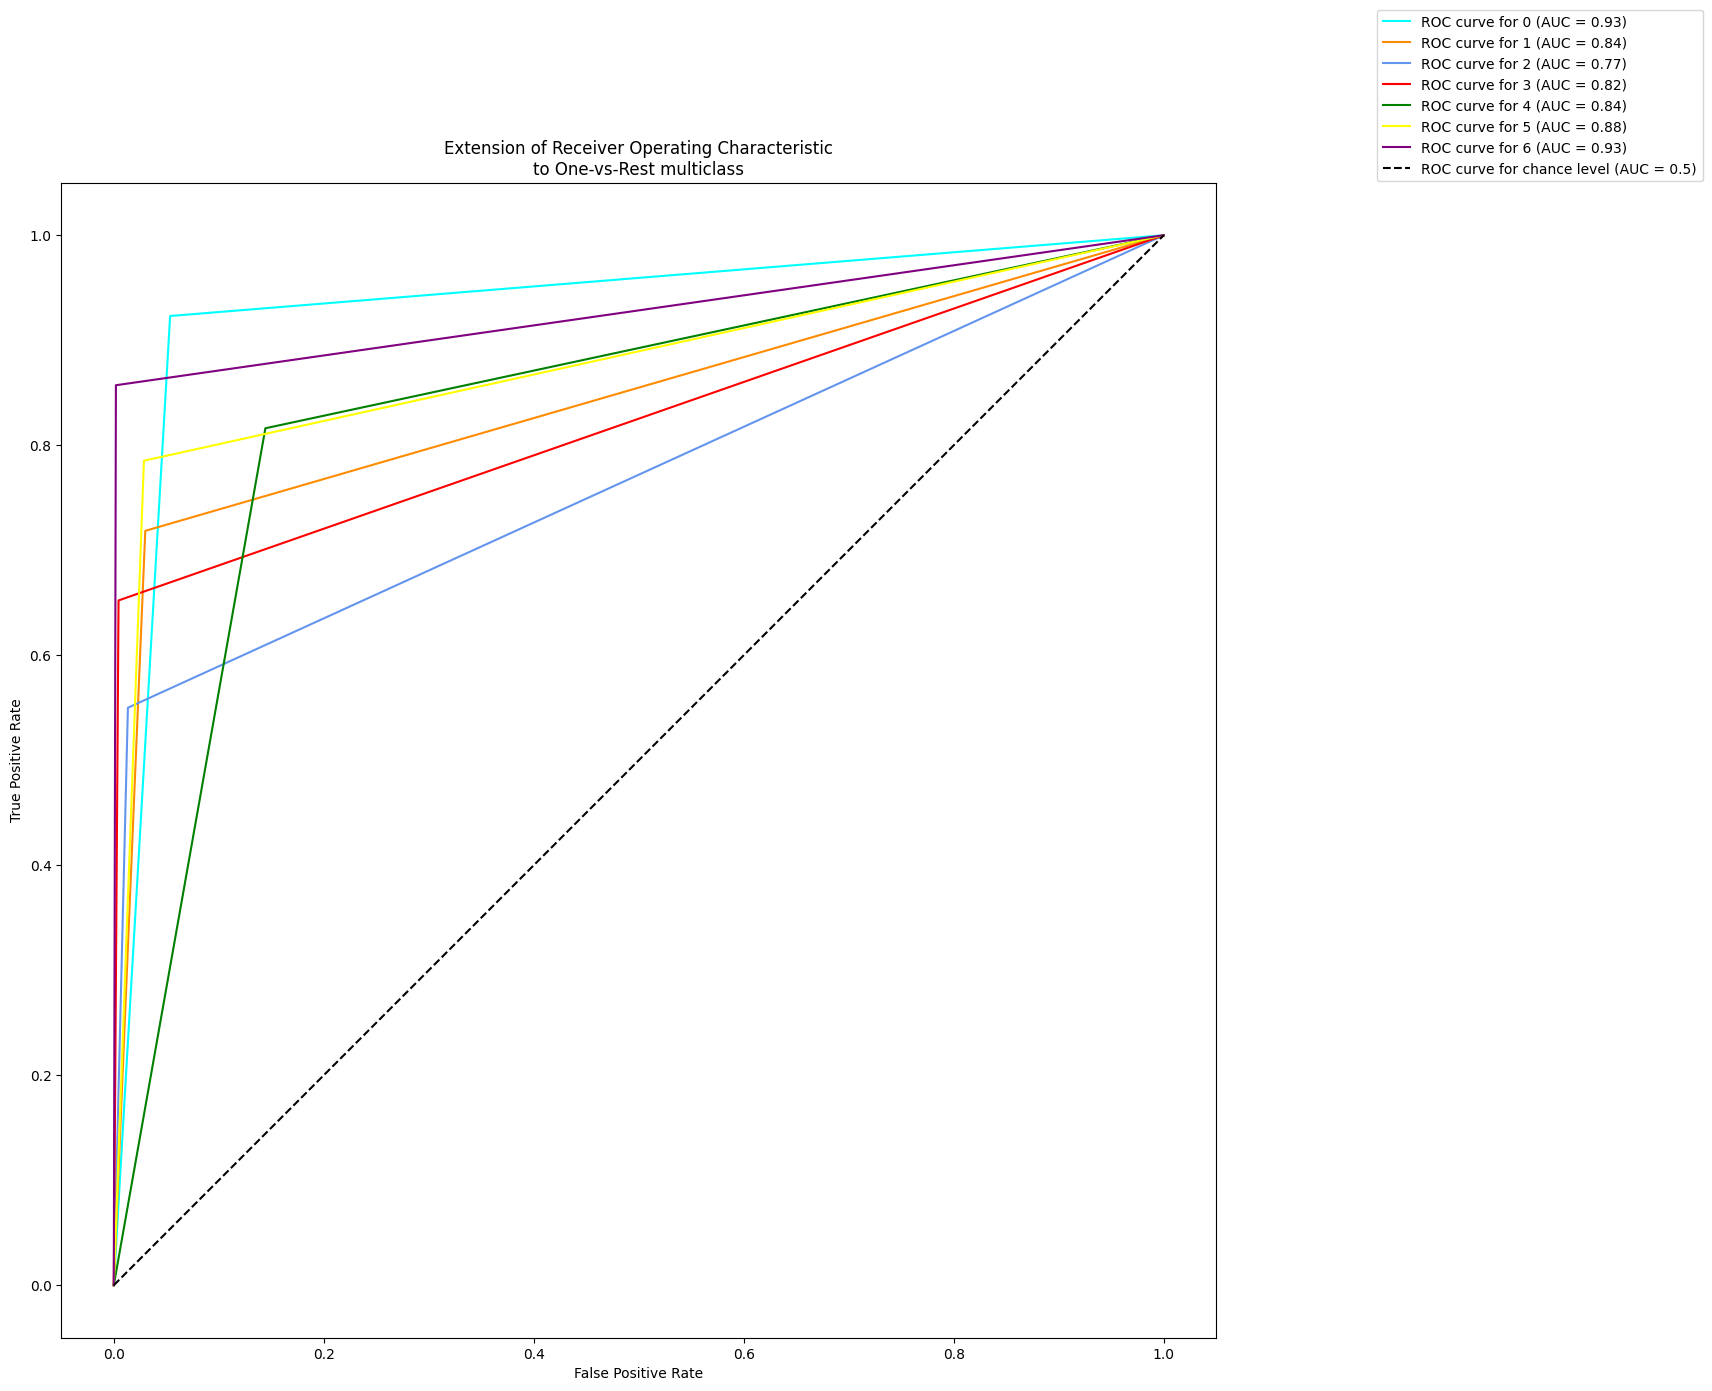

              precision    recall  f1-score   support

           0       0.37      0.92      0.52        65
           1       0.56      0.72      0.63       103
           2       0.83      0.55      0.66       220
           3       0.62      0.65      0.64        23
           4       0.41      0.82      0.55       223
           5       0.98      0.79      0.87      1341
           6       0.86      0.86      0.86        28

    accuracy                           0.76      2003
   macro avg       0.66      0.76      0.68      2003
weighted avg       0.86      0.76      0.79      2003



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66823


STAGE:2024-02-08 23:01:20 5178:5178 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.6331, macro-f1: 0.5243
Epoch 1/30 - Training Time: 1.24 seconds | Inference Time: 0.43 seconds
Epoch 2/30 - Test Accuracy: 0.6870, macro-f1: 0.5544
Epoch 2/30 - Training Time: 1.21 seconds | Inference Time: 0.42 seconds
Epoch 3/30 - Test Accuracy: 0.7084, macro-f1: 0.5857
Epoch 3/30 - Training Time: 1.10 seconds | Inference Time: 0.42 seconds
Epoch 4/30 - Test Accuracy: 0.7569, macro-f1: 0.6134
Epoch 4/30 - Training Time: 1.16 seconds | Inference Time: 0.43 seconds
Epoch 5/30 - Test Accuracy: 0.8108, macro-f1: 0.6832
Epoch 5/30 - Training Time: 1.14 seconds | Inference Time: 0.43 seconds
Epoch 6/30 - Test Accuracy: 0.7584, macro-f1: 0.6221
Epoch 6/30 - Training Time: 1.22 seconds | Inference Time: 0.42 seconds
Epoch 7/30 - Test Accuracy: 0.7803, macro-f1: 0.6547
Epoch 7/30 - Training Time: 1.06 seconds | Inference Time: 0.41 seconds
Epoch 8/30 - Test Accuracy: 0.7773, macro-f1: 0.6475
Epoch 8/30 - Training Time: 1.14 seconds | Inference Time: 0.42 seconds


STAGE:2024-02-08 23:02:12 5178:5178 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 23:02:12 5178:5178 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.68%        2.830s        64.92%       21.175s       4.467ms      -1.15 Gb      -1.17 Gb          4740  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        34.61%       11.289s        35.02%       11.422s       2.380ms       1.15 Gb       1.15 Gb          4800  
                              Optimizer.step#AdamW.step         6.23%        2.031s        30.36%        9.902s       2.619ms     522.09 Kb      -1.86

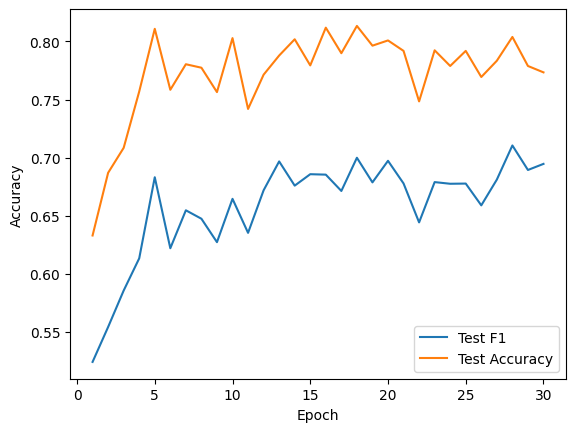

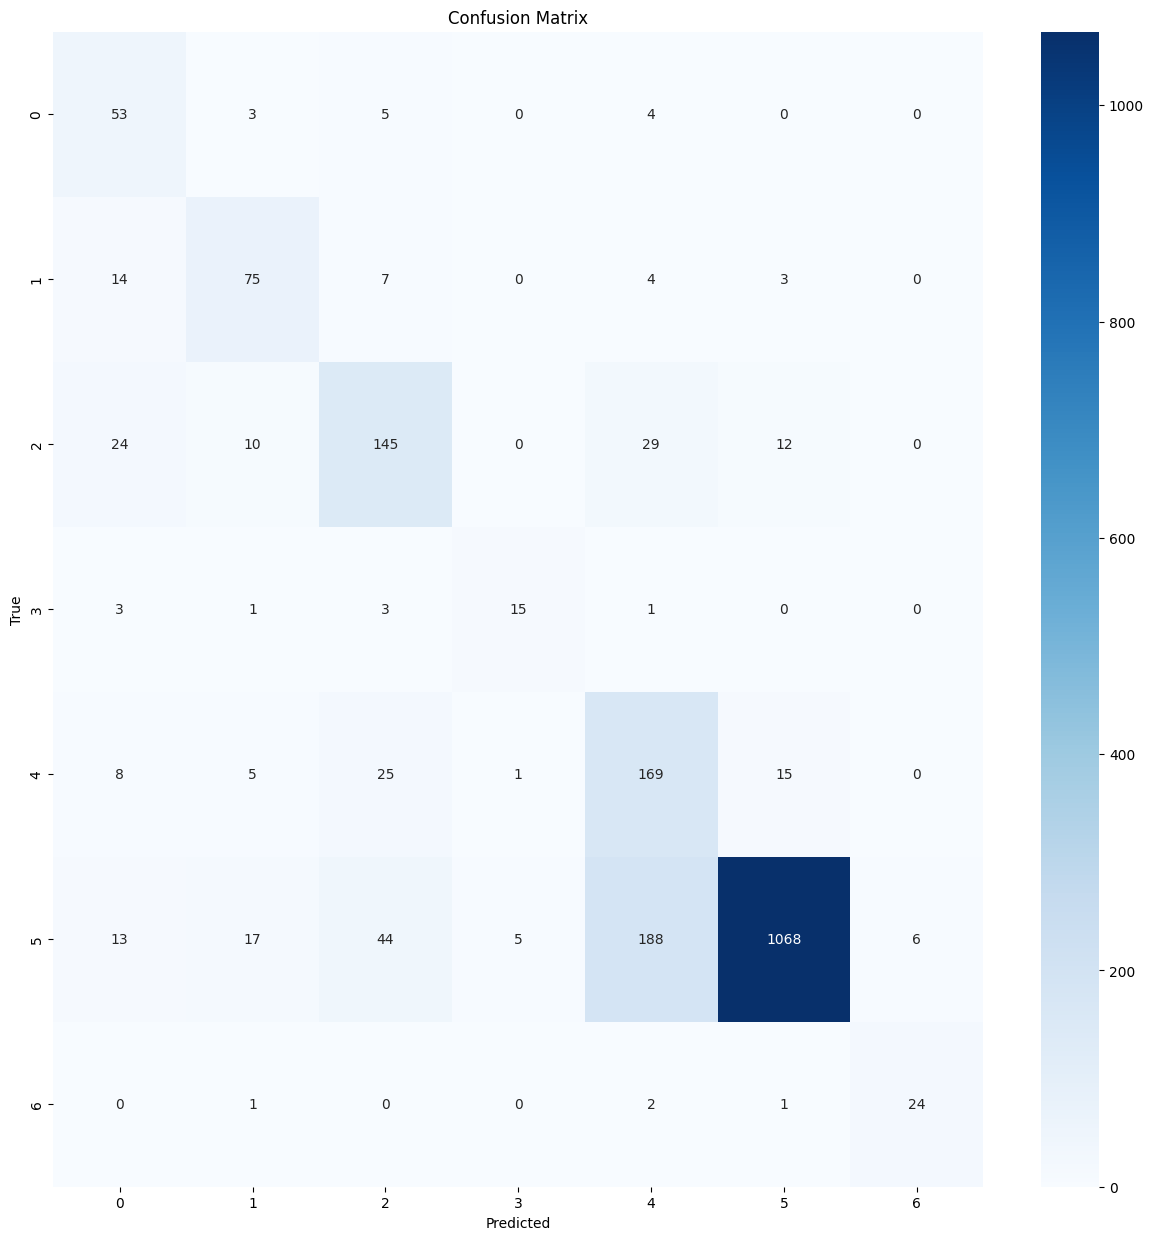

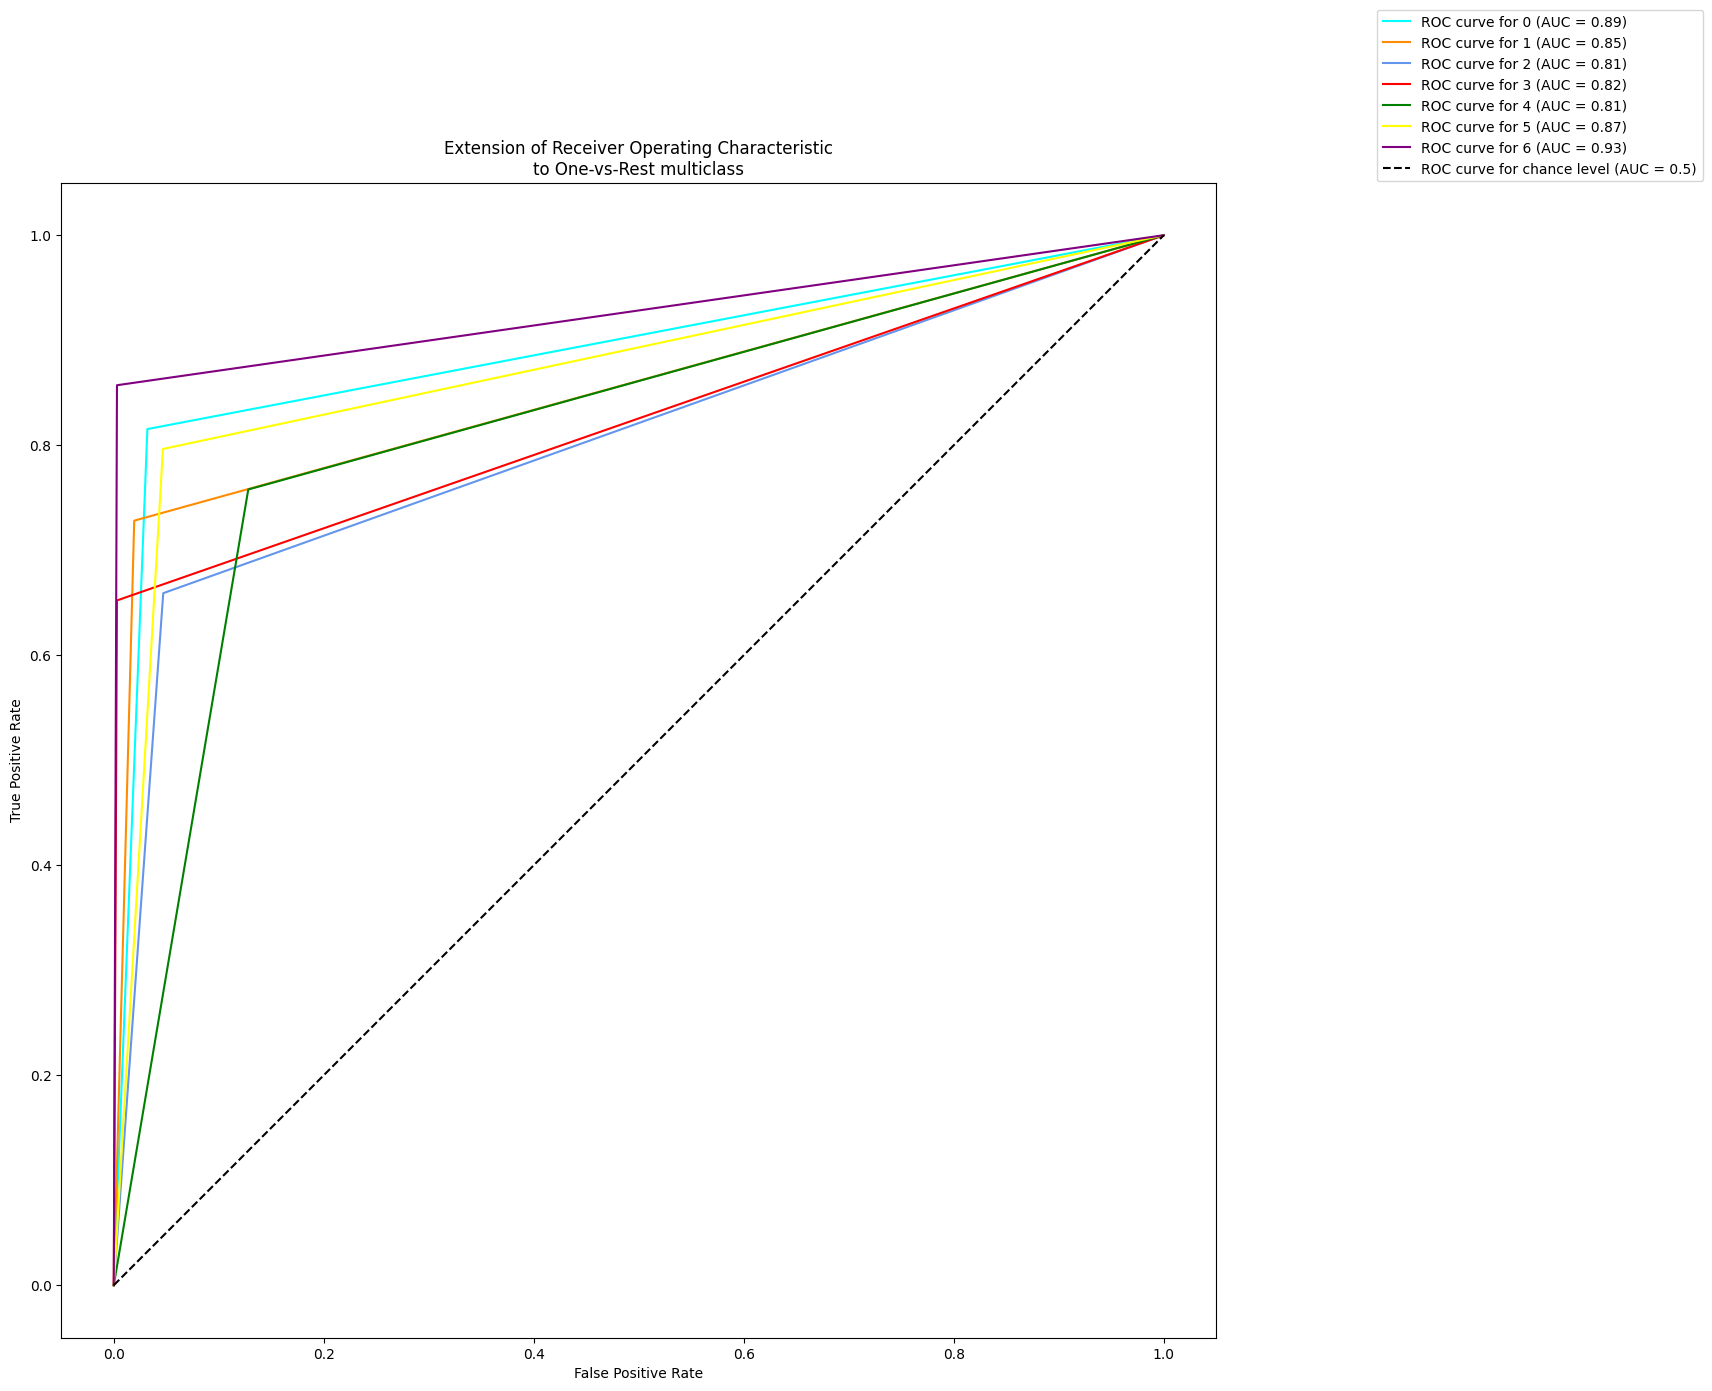

              precision    recall  f1-score   support

           0       0.46      0.82      0.59        65
           1       0.67      0.73      0.70       103
           2       0.63      0.66      0.65       220
           3       0.71      0.65      0.68        23
           4       0.43      0.76      0.55       223
           5       0.97      0.80      0.88      1341
           6       0.80      0.86      0.83        28

    accuracy                           0.77      2003
   macro avg       0.67      0.75      0.69      2003
weighted avg       0.84      0.77      0.79      2003



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)